In [98]:
##building-up-the-SEIR-network-model

In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
def SEIR(y, N, Rnaught, DI, DE):
    dydts = []
    Ss = []
    Es = []
    Is = []
    Rs = []
    for i in range(0,len(y), 4):
        Ss.append(y[i])
        Es.append(y[i+1])
        Is.append(y[i+2])
        Rs.append(y[i+3])
    for i in range(0,len(y), 4):
        S,E,I,R = np.copy(y[i:i+4])
        dSdt = 0
        for j in range(L):
            dSdt += - S*Is[j]*Rnaught[i//4,j]/(N[j]*DI)
        dEdt = -dSdt - E/DE
        dIdt = E/DE - I/DI
        dRdt = I/DI
        dydts.append(dSdt)
        dydts.append(dEdt)
        dydts.append(dIdt)
        dydts.append(dRdt)
    return dydts

In [101]:
def RK4(ts,y):
    h = ts[1] - ts[0]
    length = len(y)
    k = [0]*length
    l = [0]*length
    m = [0]*length
    n = [0]*length
    result = np.zeros((len(ts),length))
    result[0] = y
    for t in ts[:-1]:
        k = np.array([h*SEIR(y, N, Rnaught, DI, DE)[j] for j in range(length)])
        temp = [y[i]+k[i]/2 for i in range(length)]
        l = np.array([h*SEIR(temp, N, Rnaught, DI, DE)[j] for j in range(length)])
        temp = [y[i]+l[i]/2 for i in range(length)]
        m = np.array([h*SEIR(temp, N, Rnaught, DI, DE)[j] for j in range(length)])
        temp = [y[i]+m[i] for i in range(length)]
        n = np.array([h*SEIR(temp, N, Rnaught, DI, DE)[j] for j in range(length)])
#         print(k.shape,l.shape,m.shape,n.shape)
        y = y + (k+2*l+2*m+n)/6
        result[int(t+1)] = y
    return result

In [102]:
def Initialization(N):
    S = np.copy(N)
    E = [0]*(L)
    I = [0]*(L)
    R = [0]*(L)
    I[0] = 1
    S[0] = S[0] - I[0]
    y0 = []
    catorgories = [S,E,I,R]
    for i in range(L):
        for catorgory in catorgories:
            y0.append(catorgory[i])
#     print(y0)
    return y0

In [103]:
# test

In [125]:
L=1
y0 = [999,0,1,0]
N = [1000]
DE = 5
DI = 7
Rnaught = np.ones((L,L))*2.5

In [126]:
# print(Rnaught)
ts = np.linspace(0,365,365+1)
ret = RK4(ts, y0)

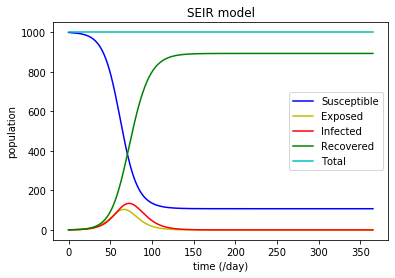

In [127]:
fig = plt.figure(figsize= (6,4))
plt.plot(ts,ret.T[0],'b',label='Susceptible')
plt.plot(ts,ret.T[1],'y',label='Exposed')
plt.plot(ts,ret.T[2],'r',label='Infected')
plt.plot(ts,ret.T[3],'g',label='Recovered')
plt.plot(ts,ret.T[0]+ret.T[1]+ret.T[2]+ret.T[3],'c',label='Total')
plt.title('SEIR model')
plt.xlabel('time (/day)')
plt.ylabel('population')
plt.legend()
fig.savefig('single-node-SEIR-model.jpg')

In [116]:
L = 1
N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
DE = 5
DI = 7
Rs = np.linspace(0,4,20)
y0 = Initialization(N)
ts = np.linspace(0,365*5,365*5+1)
Rstar = []
for R in Rs:
    Rnaught = np.ones((L,L))*R
    ret = RK4(ts, y0)
    Rstar.append(ret.T[3][-1]/N[0])

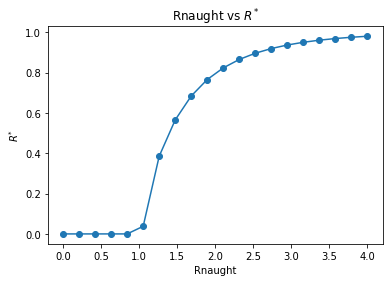

In [117]:
fig = plt.figure(figsize=(6,4))
plt.plot(Rs,Rstar,'o-')
plt.title('Rnaught vs $R^{*}$')
plt.xlabel('Rnaught')
plt.ylabel('$R^{*}$')
fig.savefig('single-node-second-order-phase-transition.jpg')

Text(0, 0.5, '$R^{*}$')

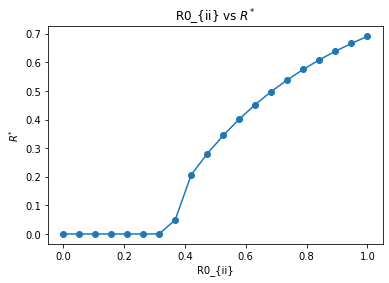

In [136]:
L = 2
N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
DE = 5
DI = 7
Rs = np.linspace(0,1,20)
y0 = Initialization(N)
ts = np.linspace(0,365*5,365*5+1)
Rstar = []
for R0ii in [0.7]:
    Rstar = []
    for R in Rs:
        Rnaught = np.ones((L,L))*R
        for i in range(L):
            Rnaught[i,i] = R0ii
        ret = RK4(ts, y0)
        Rstar.append(ret.T[3][-1]/N[0])
    plt.plot(Rs,Rstar,'o-',label = 'R_{0ii} = 0.1')
plt.title('R0_{ii} vs $R^{*}$')
plt.xlabel('R0_{ii}')
plt.ylabel('$R^{*}$')

In [137]:
print(Rstar)

[1.3345594969476013e-06, 1.3769397039967274e-06, 1.5219306302296642e-06, 1.845880080470354e-06, 2.6294358961649008e-06, 5.769742104244792e-06, 0.0001263426081159819, 0.04965386950603527, 0.20740565718798765, 0.28059112589385227, 0.34486393731762793, 0.40193023323148713, 0.45279655437455363, 0.4982990469879865, 0.5391377484059869, 0.5759024910999345, 0.6090931944579978, 0.6391359004629635, 0.6663955493364103, 0.6911862352981311]


In [45]:
# test for the netowrk

In [7]:
L = 19 #Taiwan
N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
DE = 5
DI = 7
Rnaught = np.ones((L,L))*2.5
y0 = Initialization(N)

print(y0)

[820287, 0, 1, 0, 1163783, 0, 0, 0, 3978348, 0, 0, 0, 3499488, 0, 0, 0, 3004183, 0, 0, 0, 1083824, 0, 0, 0, 3938661, 0, 0, 0, 2360225, 0, 0, 0, 271422, 0, 0, 0, 3272382, 0, 0, 0, 2584838, 0, 0, 0, 442579, 0, 0, 0, 2148768, 0, 0, 0, 3169717, 0, 0, 0, 538257, 0, 0, 0, 1330541, 0, 0, 0, 1160227, 0, 0, 0, 3388477, 0, 0, 0, 665651, 0, 0, 0]


In [8]:
ts = np.linspace(0,365,366)

# Integrate the SIR equations over the time grid, t.
ret = RK4(ts, y0)

In [14]:
print(ret.T[7][-1]/N[1])

0.9999999999270452


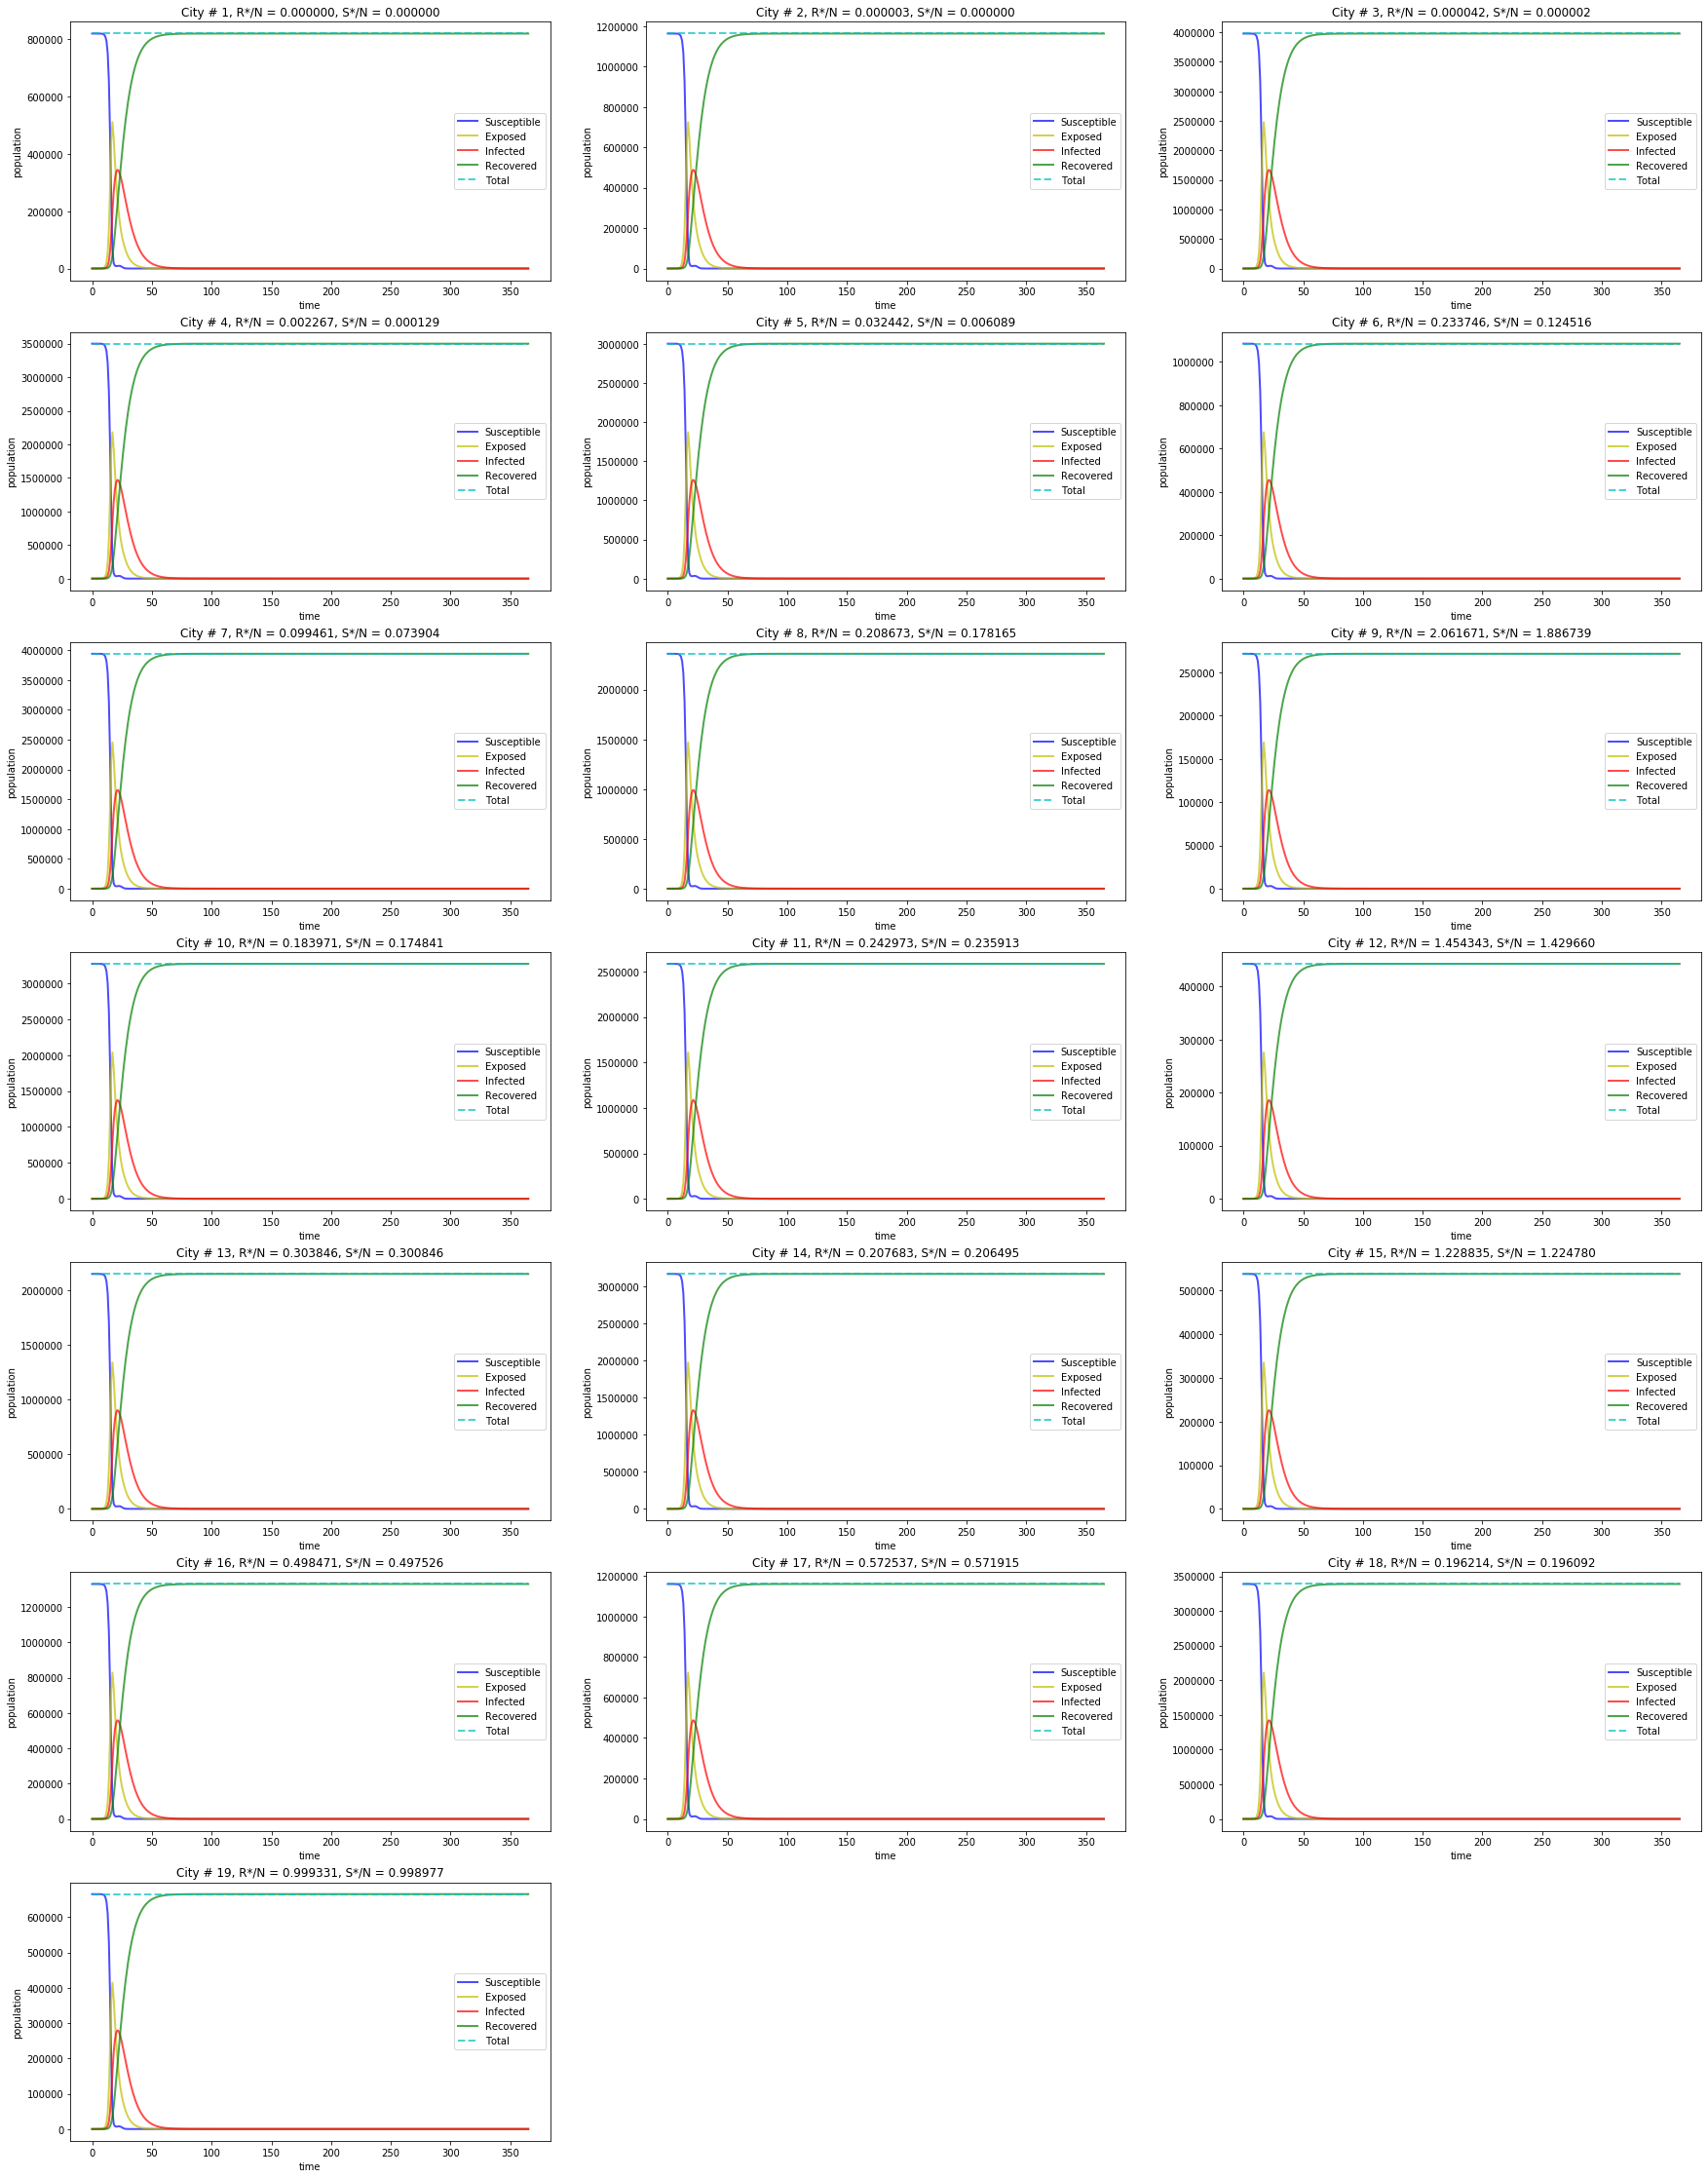

In [15]:
fig = plt.figure(figsize=(30,40))
for i in range(0,L*4,4): #for cities
    plt.subplot(7,3,(i//4)+1)
    plt.plot(ts, ret.T[i], 'b', alpha=0.7, linewidth=2, label='Susceptible')
    plt.plot(ts, ret.T[i+1], 'y', alpha=0.7, linewidth=2, label='Exposed')
    plt.plot(ts, ret.T[i+2], 'r', alpha=0.7, linewidth=2, label='Infected')
    plt.plot(ts, ret.T[i+3], 'g', alpha=0.7, linewidth=2, label='Recovered')
    plt.plot(ts, ret.T[i]+ret.T[i+1]+ret.T[i+2]+ret.T[i+3], 'c--', alpha=0.7, linewidth=2, label='Total')
    plt.legend()
    plt.ylabel('population')
    plt.xlabel('time')
    plt.title('City # %d, R*/N = %f, S*/N = %f'%(i//4+1, ret.T[i+3][-1]/N[i//4],ret.T[i][-1]/N[i//4]))

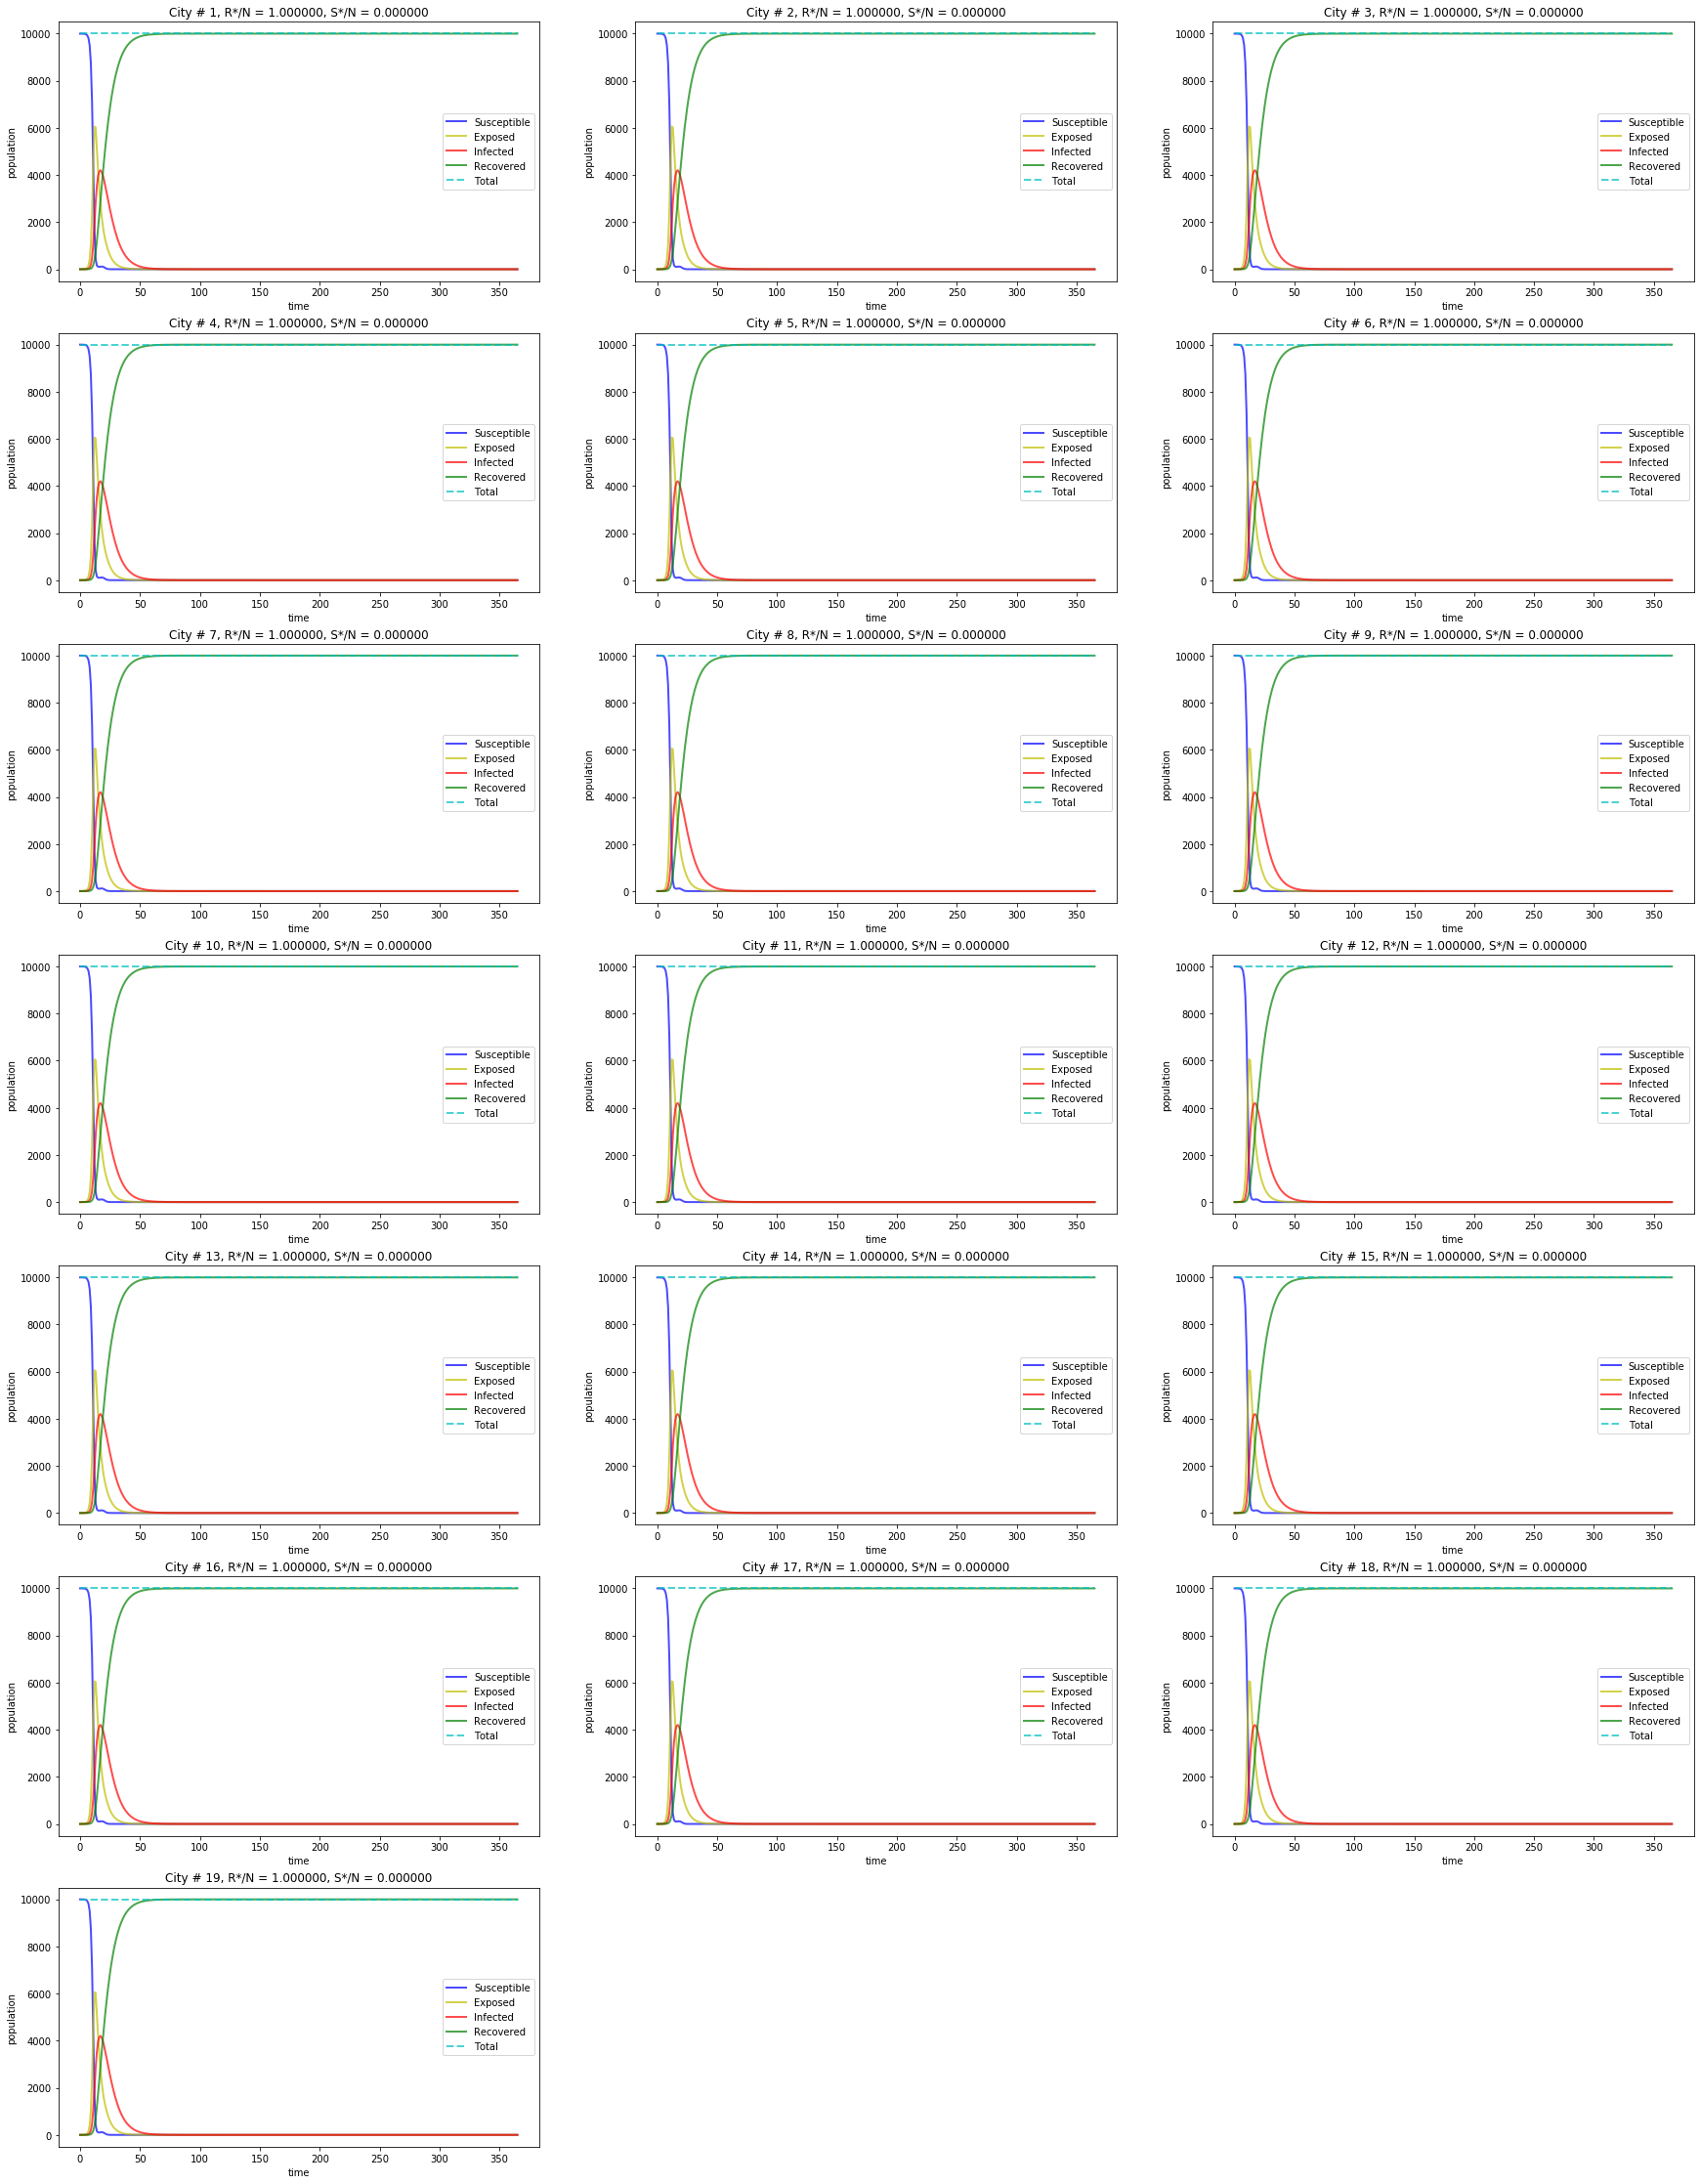

In [16]:
L = 19 #Taiwan
N = [10000]*L
DE = 5
DI = 7
Rnaught = np.ones((L,L))*2.5
y0 = Initialization(N)
ts = np.linspace(0,365,366)

# Integrate the SIR equations over the time grid, t.
ret = RK4(ts, y0)
fig = plt.figure(figsize=(30,40))
for i in range(0,L*4,4): #for cities
    plt.subplot(7,3,(i//4)+1)
    plt.plot(ts, ret.T[i], 'b', alpha=0.7, linewidth=2, label='Susceptible')
    plt.plot(ts, ret.T[i+1], 'y', alpha=0.7, linewidth=2, label='Exposed')
    plt.plot(ts, ret.T[i+2], 'r', alpha=0.7, linewidth=2, label='Infected')
    plt.plot(ts, ret.T[i+3], 'g', alpha=0.7, linewidth=2, label='Recovered')
    plt.plot(ts, ret.T[i]+ret.T[i+1]+ret.T[i+2]+ret.T[i+3], 'c--', alpha=0.7, linewidth=2, label='Total')
    plt.legend()
    plt.ylabel('population')
    plt.xlabel('time')
    plt.title('City # %d, R*/N = %f, S*/N = %f'%(i//4+1, ret.T[i+3][-1]/N[i//4],ret.T[i][-1]/N[i//4]))

In [17]:
L = 19 #Taiwan
N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
DE = 5
DI = 7
Rnaught = np.random.random((L,L))*0.05
for i in range(L):
    Rnaught[i,i] = 0.1 * (i+1)
y0 = Initialization(N)
ts = np.linspace(0,365*3,365*3+1)

# Integrate the SIR equations over the time grid, t.
ret = RK4(ts, y0)

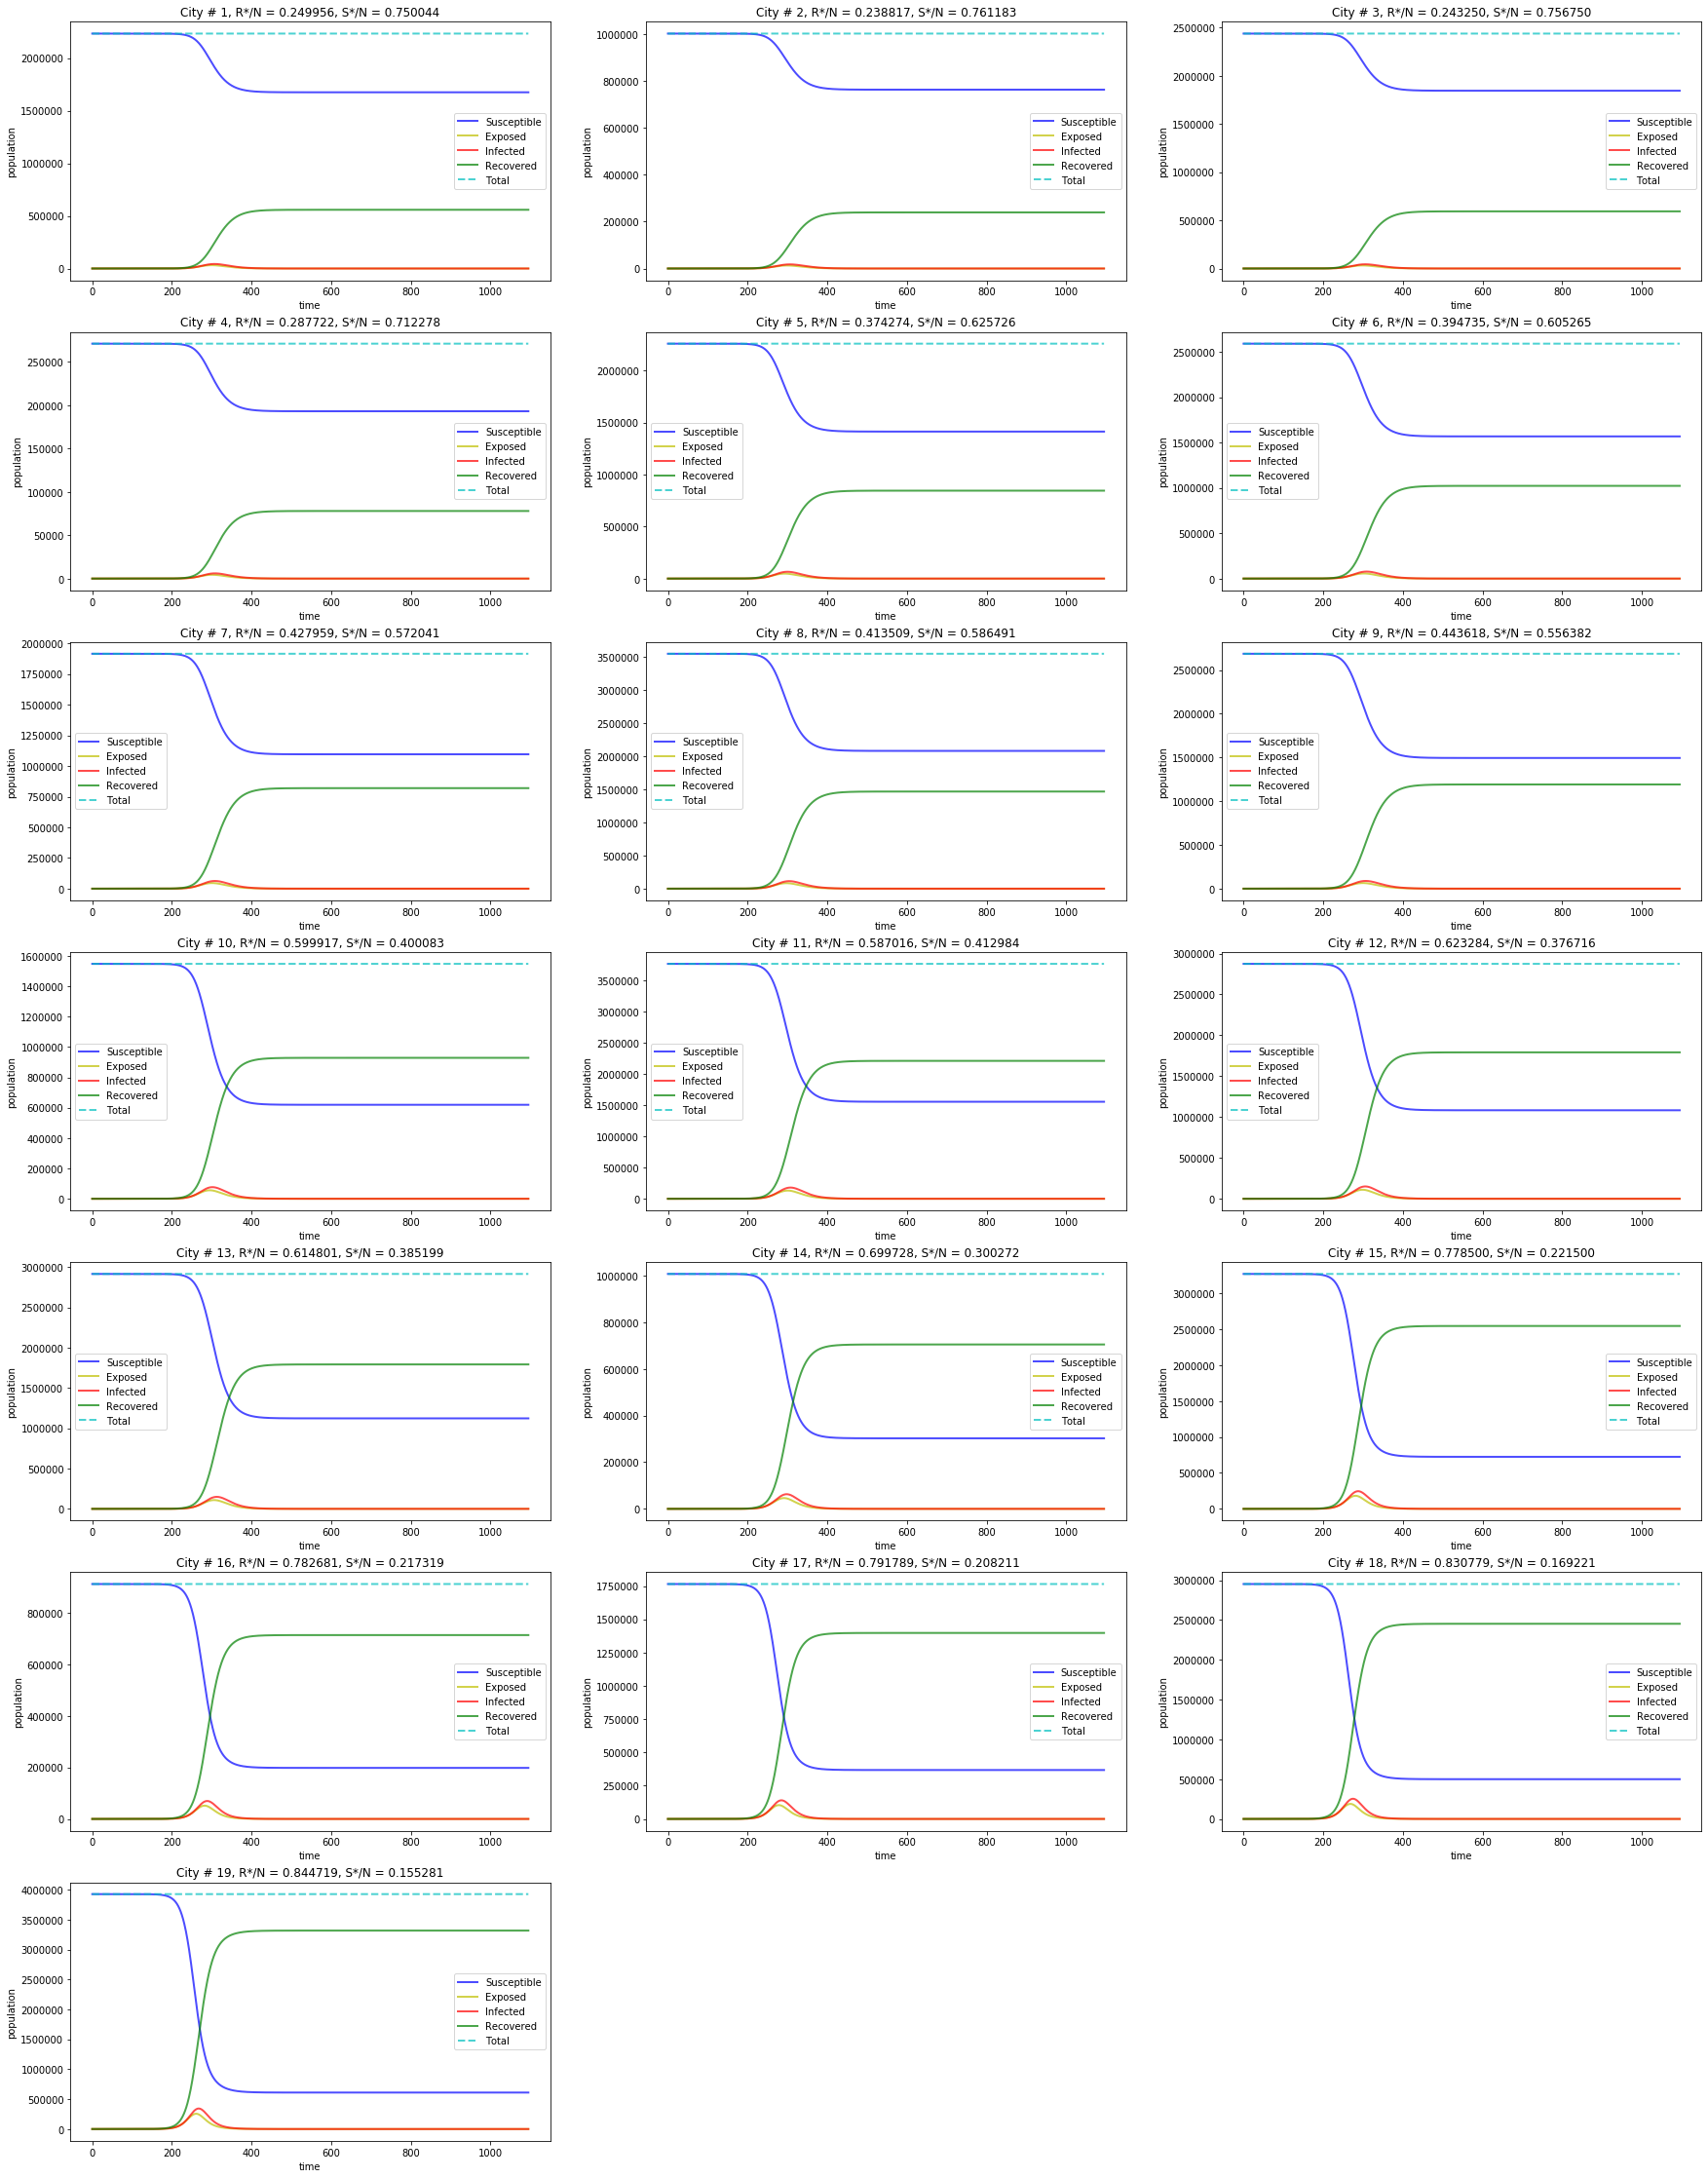

In [18]:
fig = plt.figure(figsize=(30,40))
for i in range(0,L*4,4): #for cities
    plt.subplot(7,3,(i//4)+1)
    plt.plot(ts, ret.T[i], 'b', alpha=0.7, linewidth=2, label='Susceptible')
    plt.plot(ts, ret.T[i+1], 'y', alpha=0.7, linewidth=2, label='Exposed')
    plt.plot(ts, ret.T[i+2], 'r', alpha=0.7, linewidth=2, label='Infected')
    plt.plot(ts, ret.T[i+3], 'g', alpha=0.7, linewidth=2, label='Recovered')
    plt.plot(ts, ret.T[i]+ret.T[i+1]+ret.T[i+2]+ret.T[i+3], 'c--', alpha=0.7, linewidth=2, label='Total')
    plt.legend()
    plt.ylabel('population')
    plt.xlabel('time')
    plt.title('City # %d, R*/N = %f, S*/N = %f'%(i//4+1, ret.T[i+3][-1]/N[i//4],ret.T[i][-1]/N[i//4]))

In [70]:
L = 19 #Taiwan
# N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
N = [10000]*19
DE = 5
DI = 7
    
        
y0 = Initialization(N)
Rs = np.linspace(0,0.2,20)
ts = np.linspace(0,365*5,365*5+1)
Rstar = []
for R in Rs:
    print(R)
    Rnaught = np.ones((L,L))*R
    for i in range(L):
        Rnaught[i,i] = 0.1
    y0 = Initialization(N)
    ret = RK4(ts, y0)
    Rstar.append(ret.T[7][-1]/N[1])

0.0
0.010526315789473684
0.021052631578947368
0.031578947368421054
0.042105263157894736
0.05263157894736842
0.06315789473684211
0.07368421052631578
0.08421052631578947
0.09473684210526316
0.10526315789473684
0.11578947368421053
0.12631578947368421
0.1368421052631579
0.14736842105263157
0.15789473684210525
0.16842105263157894
0.17894736842105263
0.18947368421052632
0.2


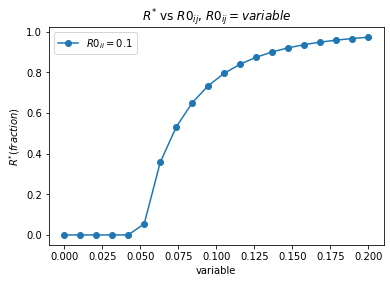

In [75]:
fig = plt.figure(figsize = (6,4))
plt.plot(Rs,Rstar,'o-',label='$R0_{ii} = 0.1$')
plt.title('$R^{*}$ vs $R0_{ij}$, $R0_{ij} = variable$')
plt.ylabel('$R^{*} (fraction)$')
plt.xlabel('variable')
plt.legend()
fig.savefig('Sponteneous-infection-one-curve.jpg')

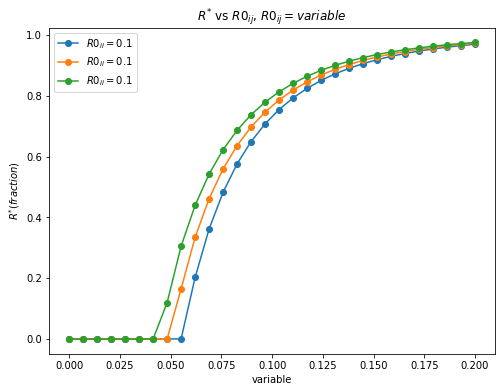

In [79]:
L = 19 #Taiwan
# N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
N = [10000]*19
DE = 5
DI = 7
Rs = np.linspace(0,0.2,30)
ts = np.linspace(0,365*5,365*5+1)

fig = plt.figure(figsize = (8,6))
for R0ii in [0,0.1,0.2]:
    Rstar = []
    for R in Rs:
#         print(R)
        Rnaught = np.ones((L,L))*R
        for i in range(L):
            Rnaught[i,i] = R0ii
        y0 = Initialization(N)
        ret = RK4(ts, y0)
        Rstar.append(ret.T[7][-1]/N[0])
    plt.plot(Rs,Rstar,'o-',label='$R0_{ii} = 0.1$')
plt.title('$R^{*}$ vs $R0_{ij}$, $R0_{ij} = variable$')
plt.ylabel('$R^{*} (fraction)$')
plt.xlabel('variable')
plt.legend()
fig.savefig('Sponteneous-infection-three-curve.jpg')

In [118]:
L = 19 #Taiwan
# N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
N = [10000]*19
DE = 5
DI = 7
Rs = np.linspace(0.03,0.065,30)
ts = np.linspace(0,365*5,365*5+1)

fig = plt.figure(figsize = (8,6))
for R0ii in [0,0.1,0.2]:
#     print(R0ii)
    Rstar = []
    for R in Rs:
#         print(R)
        Rnaught = np.ones((L,L))*R
        for i in range(L):
            Rnaught[i,i] = R0ii
        y0 = Initialization(N)
        ret = RK4(ts, y0)
        Rstar.append(ret.T[7][-1]/N[0])
#         print(Rstar)
    plt.plot(Rs,Rstar,'o-',label='$R0_{ii} = %f$'%R0ii)
plt.title('$R^{*}$ vs $R0_{ij}$, $R0_{ij} = variable$')
plt.ylabel('$R^{*} (fraction)$')
plt.xlabel('variable')
plt.legend()
fig.savefig('Sponteneous-infection-three-curve-zoom-in.jpg')

KeyboardInterrupt: 

<Figure size 576x432 with 0 Axes>

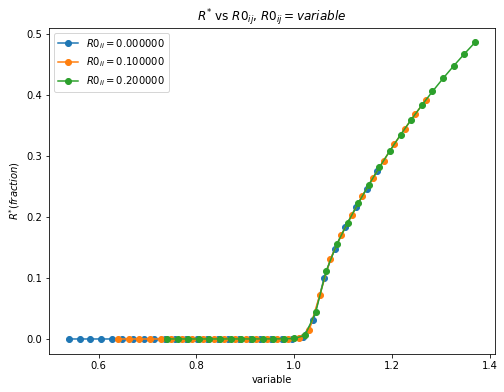

In [20]:
L = 19 #Taiwan
# N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
N = [10000]*19
DE = 5
DI = 7
Rs = np.linspace(0.03,0.065,30)
ts = np.linspace(0,365*5,365*5+1)

fig = plt.figure(figsize = (8,6))
for R0ii in [0,0.1,0.2]:
#     print(R0ii)
    Rstar = []
    for R in Rs:
#         print(R)
        Rnaught = np.ones((L,L))*R
        for i in range(L):
            Rnaught[i,i] = R0ii
        y0 = Initialization(N)
        ret = RK4(ts, y0)
        Rstar.append(ret.T[7][-1]/N[0])
#         print(Rstar)
    xs = [R0ii + Rs[i]*(L-1) for i in range(len(Rs))]
    plt.plot(xs,Rstar,'o-',label='$R0_{ii} = %f$'%R0ii)
plt.title('$R^{*}$ vs $R0_{ij}$, $R0_{ij} = variable$')
plt.ylabel('$R^{*} (fraction)$')
plt.xlabel('variable')
plt.legend()
fig.savefig('Sponteneous-infection-collapse.jpg')

[[0.1797075  0.18754732]
 [0.07497395 0.18191568]]


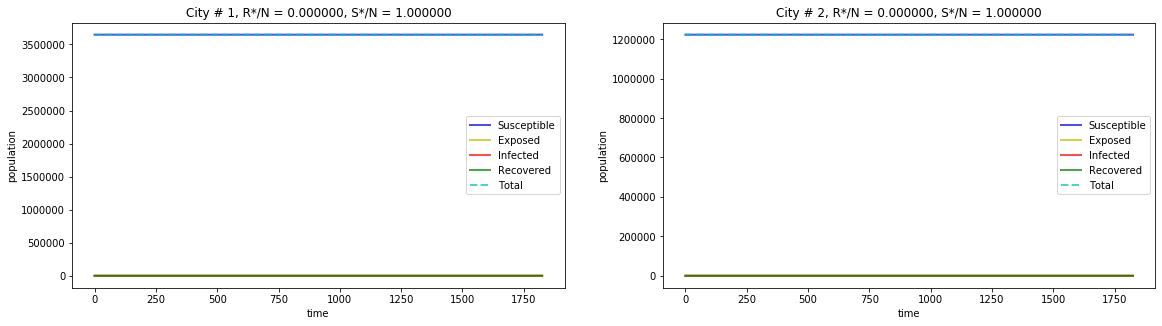

In [78]:
C = np.random.random((2,2))
# a = 0.5
# b = 0.55
# C = np.array([[a,b],[b,a]])
print(C)

L = 2 #Taiwan
N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
DE = 5
DI = 7
Rnaught = np.copy(C)
y0 = Initialization(N)
ts = np.linspace(0,365*5,365*5+1)

# Integrate the SIR equations over the time grid, t.
ret = RK4(ts, y0)
fig = plt.figure(figsize=(30,40))
for i in range(0,L*4,4): #for cities
    plt.subplot(7,3,(i//4)+1)
    plt.plot(ts, ret.T[i], 'b', alpha=0.7, linewidth=2, label='Susceptible')
    plt.plot(ts, ret.T[i+1], 'y', alpha=0.7, linewidth=2, label='Exposed')
    plt.plot(ts, ret.T[i+2], 'r', alpha=0.7, linewidth=2, label='Infected')
    plt.plot(ts, ret.T[i+3], 'g', alpha=0.7, linewidth=2, label='Recovered')
    plt.plot(ts, ret.T[i]+ret.T[i+1]+ret.T[i+2]+ret.T[i+3], 'c--', alpha=0.7, linewidth=2, label='Total')
    plt.legend()
    plt.ylabel('population')
    plt.xlabel('time')
    plt.title('City # %d, R*/N = %f, S*/N = %f'%(i//4+1, ret.T[i+3][-1]/N[i//4],ret.T[i][-1]/N[i//4]))

In [79]:
print((C[0,0]+C[1,1]+(C[0,0]**2+4*C[0,1]*C[1,0]-2*C[0,0]*C[1,1]+C[1,1]**2)**0.5)*0.5)

0.29939651349865337


[[0.95478597 0.08927628]
 [0.85653293 0.87759503]]


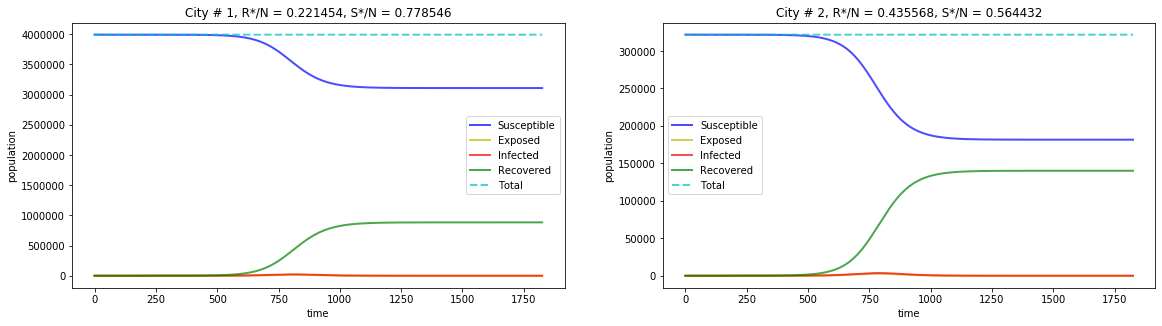

In [80]:
C = np.random.random((2,2))
# a = 0.5
# b = 0.55
# C = np.array([[a,b],[b,a]])
print(C)

L = 2 #Taiwan
N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
DE = 5
DI = 7
Rnaught = np.copy(C)
y0 = Initialization(N)
ts = np.linspace(0,365*5,365*5+1)

# Integrate the SIR equations over the time grid, t.
ret = RK4(ts, y0)
fig = plt.figure(figsize=(30,40))
for i in range(0,L*4,4): #for cities
    plt.subplot(7,3,(i//4)+1)
    plt.plot(ts, ret.T[i], 'b', alpha=0.7, linewidth=2, label='Susceptible')
    plt.plot(ts, ret.T[i+1], 'y', alpha=0.7, linewidth=2, label='Exposed')
    plt.plot(ts, ret.T[i+2], 'r', alpha=0.7, linewidth=2, label='Infected')
    plt.plot(ts, ret.T[i+3], 'g', alpha=0.7, linewidth=2, label='Recovered')
    plt.plot(ts, ret.T[i]+ret.T[i+1]+ret.T[i+2]+ret.T[i+3], 'c--', alpha=0.7, linewidth=2, label='Total')
    plt.legend()
    plt.ylabel('population')
    plt.xlabel('time')
    plt.title('City # %d, R*/N = %f, S*/N = %f'%(i//4+1, ret.T[i+3][-1]/N[i//4],ret.T[i][-1]/N[i//4]))

In [81]:
print((C[0,0]+C[1,1]+(C[0,0]**2+4*C[0,1]*C[1,0]-2*C[0,0]*C[1,1]+C[1,1]**2)**0.5)*0.5)

1.1953995312434387


In [34]:
L = 2 #Taiwan
# N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
N = [10000]*L
DE = 5
DI = 7
Rs = np.linspace(0.03,0.065,30)
ts = np.linspace(0,365*5,365*5+1)

R011s = np.linspace(0,1.2,20)
Rstar = []
Rnaught = np.random.random((L,L))
for R011 in R011s:
    Rnaught[1,1] = R011
#     print(Rnaught)
    y0 = Initialization(N)
    ret = RK4(ts, y0)
    Rstar.append(ret.T[7][-1]/N[0])
#     xs = [R0ii + Rs[i]*(L-1) for i in range(len(Rs))]

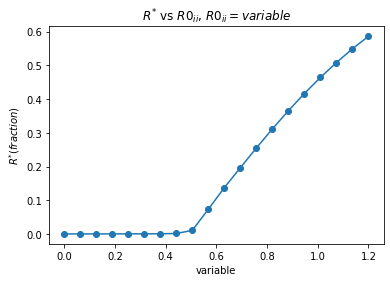

In [35]:
# fig = plt.figure(figsize = (8,6))
plt.plot(R011s,Rstar,'o-')
plt.title('$R^{*}$ vs $R0_{ii}$, $R0_{ii} = variable$')
plt.ylabel('$R^{*} (fraction)$')
plt.xlabel('variable')
# plt.legend()
fig.savefig('Sponteneous-infection-collapse-general.jpg')

In [37]:
C = np.zeros((2,2))
for i in range(2):
    for j in range(2):
        C[i,j] = Rnaught[i,j]

Text(0, 0.5, '$R_{eff}$')

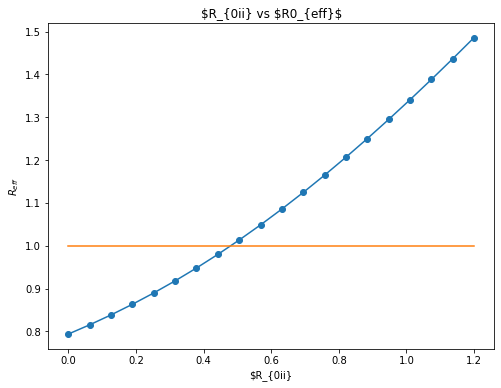

In [39]:
fig = plt.figure(figsize = (8,6))
R0s =[]
for R011 in R011s:
    R0 = (C[0,0]+R011+(C[0,0]**2+4*C[0,1]*C[1,0]-2*C[0,0]*R011+R011**2)**0.5)*0.5
#     print(R0,R011)
    R0s.append(R0)
plt.plot(R011s,R0s,'o-')
plt.plot(R011s,[1]*len(R011s),'-')
plt.title('$R_{0ii}$ vs $R0_{eff}$')
plt.xlabel('$R_{0ii}$')
plt.ylabel('$R_{eff}$')

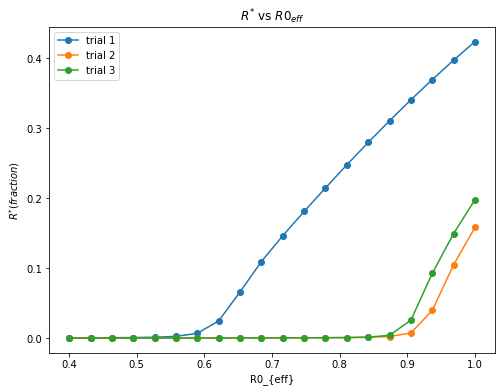

In [93]:
L = 2 #Taiwan
# N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
N = [10000]*L
DE = 5
DI = 7
# Rs = np.linspace(0.03,0.065,30)
ts = np.linspace(0,365*5,365*5+1)

fig = plt.figure(figsize = (8,6))
R011s = np.linspace(0.4,1,20)
Rnaughts = np.zeros((3,L,L))
for j in range(3):
    Rstar = []
    Rnaught = np.random.random((L,L))*0.6
    for R011 in R011s:
        Rnaught[1,1] = R011
#         print(Rnaught)
        y0 = Initialization(N)
        ret = RK4(ts, y0)
        Rstar.append(ret.T[7][-1]/N[0])
    Rnaughts[j] = Rnaught
    plt.plot(R011s,Rstar,'o-',label='trial %d'%(j+1))
plt.title('$R^{*}$ vs $R0_{eff}$')
plt.ylabel('$R^{*} (fraction)$')
plt.xlabel('R0_{eff}')
plt.legend()

In [94]:
fig.savefig('SSB-two-nodes.jpg')

[[0.48235454 0.52467623]
 [0.41021802 1.        ]]
[[0.4444741  0.1044904 ]
 [0.48218053 1.        ]]
[[0.01162358 0.19326784]
 [0.59468011 1.        ]]


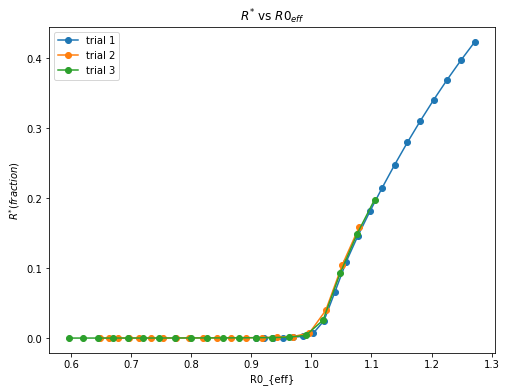

In [96]:
L = 2 #Taiwan
# N = np.random.randint(2.1*10**5,4.02*10**6,size=L)
N = [10000]*L
DE = 5
DI = 7
Rs = np.linspace(0.03,0.065,30)
ts = np.linspace(0,365*5,365*5+1)

fig = plt.figure(figsize = (8,6))
R011s = np.linspace(0.4,1,20)
for j in range(3):
    Rnaught = Rnaughts[j]
    Rstar = []
#     Rnaught = np.random.random((L,L))
    xs = []
    for R011 in R011s:
        Rnaught[1,1] = R011
        y0 = Initialization(N)
        ret = RK4(ts, y0)
        Rstar.append(ret.T[7][-1]/N[0])
        x = (Rnaught[0,0]+R011+(Rnaught[0,0]**2+4*Rnaught[0,1]*Rnaught[1,0]-2*Rnaught[0,0]*R011+R011**2)**0.5)*0.5
        xs.append(x)
    print(Rnaught)
    plt.plot(xs,Rstar,'o-',label='trial %d'%(j+1))
plt.title('$R^{*}$ vs $R0_{eff}$')
plt.ylabel('$R^{*} (fraction)$')
plt.xlabel('R0_{eff}')
plt.legend()

In [97]:
fig.savefig('data-collapse-two-nodes.jpg')